# Conveniently shifting the first level
There is a convenient way to consider an additional detuning of the first level. This is equivalent to shifting all levels except the first in the contrary direction of this detuning and changing only the frequency of the lasers coupling to the first level. <br>
We look again at the Raman system with constant lasers and show how the shift is applied.

In [2]:
from atomcalc import Level, Laser, Decay, System, plot_pulse

We define the same parameters as in the first example but with an additional detuning called shift.

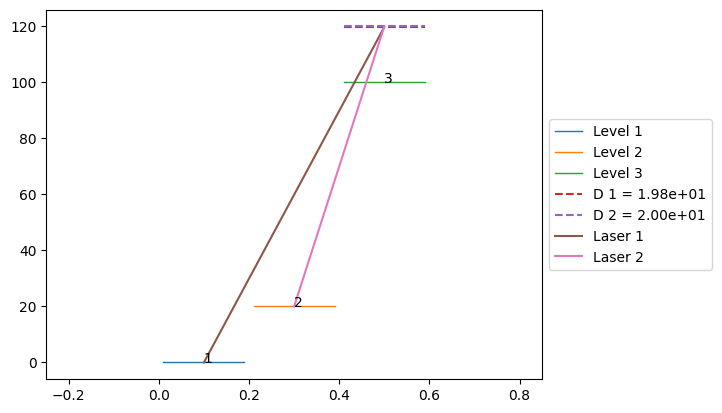

In [3]:
# define level objects
level1 = Level(0)
level2 = Level(20)
level3 = Level(100)

# define decay object
decay = Decay([0,0],[[level3,level1],[level3,level2]]) # no decay

# define parameters
Delta = 20
delta = 0
Omega1 = 1
Omega2 = 1
shift = 0.2 # <--- new detuning

# define lasers (sort level couples from low to high energy.)
laser1 = Laser(Omega1, 100 + (Delta-shift), [level1,level3]) # <--- Change the frequency of the laser coupling to level 1
laser2 = Laser(Omega2, 80 + (Delta-delta), [level2,level3])

# define system (sort levels by energy in ascending order. The order of the lasers should not matter.)
system = System([level1,level2,level3], [laser1,laser2], decay)

# draw the system in matplotlib
system.draw()

Note that the draw method shows this change only as a shorter line of Laser 1 that still originates from a non-detuned Level 1. Ideally it would draw this Laser 1 line from a detuning at the first level so that the dashed detuning lines D 1 and D 2 are on the same height again which is what the system represents. But the draw function is very rudimentary. <br>
We use the delta_stark_shift option of the simulate method to consider this shift in the simulation.

Hamiltonian in the rotating frame: Quantum object: dims = [[3], [3]], shape = (3, 3), type = oper, isherm = True
Qobj data =
[[ 0.2  0.   0.5]
 [ 0.   0.   0.5]
 [ 0.5  0.5 20. ]]


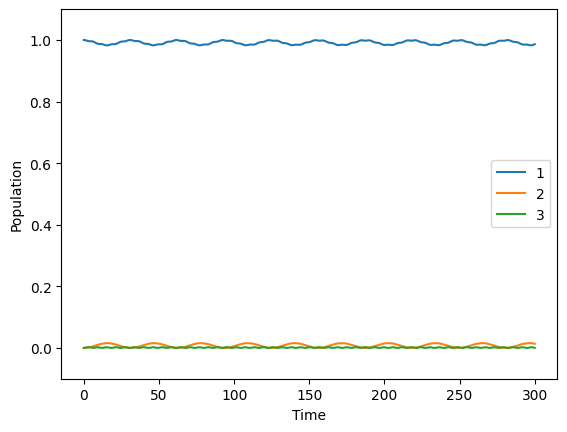

Maximum population of level 2:


0.015647914604337877

In [4]:
# calculate and show the time evolution with the shift
system.simulate([1,0,0], 1, 300, Diagonalization=True, delta_stark_shift=shift)